# Normal PDF

(100000,)
[ 18.25285408  18.18791821  20.42517982 ...,  19.479013    19.94005461
  19.6636763 ]



[ 25.83514931  21.5963716   21.71185451 ...,  28.6669951   15.21278983
  20.83944015]



[ 19.64987293  12.73373019  22.33505154 ...,  10.16962513  26.86375991
  40.29642751]





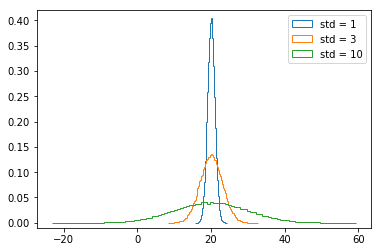

In [15]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
import numpy as np
import matplotlib.pyplot as plt
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)
print(samples_std1.shape)
print(samples_std1)
print('\n\n')
print(samples_std3)
print('\n\n')
print(samples_std10)
print('\n\n')
# Make histograms
_ = plt.hist(samples_std1, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, normed=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, normed=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


# Normal CDF

In [16]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=len(data)

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1,n+1) / n

    return x, y


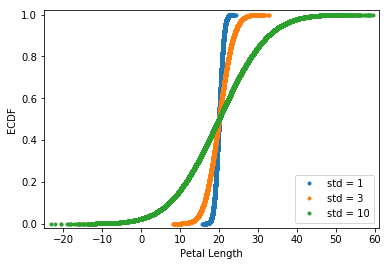

In [17]:
# Generate CDFs
x_std1,y_std1=ecdf(samples_std1)
x_std3,y_std3=ecdf(samples_std3)
x_std10,y_std10=ecdf(samples_std10)

# Plot CDFs
_=plt.plot(x_std1,y_std1,marker='.',linestyle='none')
_=plt.plot(x_std3,y_std3,marker='.',linestyle='none')
_=plt.plot(x_std10,y_std10,marker='.',linestyle='none')


# Label the axes
plt.xlabel('Petal Length')
plt.ylabel('ECDF')




# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation

In [18]:
belmont_no_outliers=[ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ]

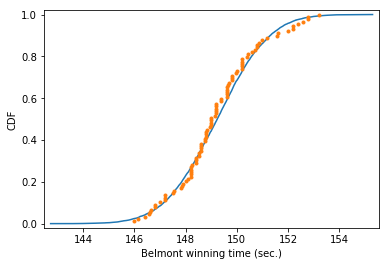

In [19]:
# Compute mean and standard deviation: mu, sigma
mu=np.mean(belmont_no_outliers)
sigma=np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples=np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

In [20]:
# Take a million samples out of the Normal distribution: samples
samples=np.random.normal(mu,sigma,size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=(np.sum(samples>144)/1000000)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.999377


# Exponential Distribution

The Exponential distribution describes the waiting times between rare events.

Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

In [22]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1,size=size)
    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2,size=size)

    return t1 + t2


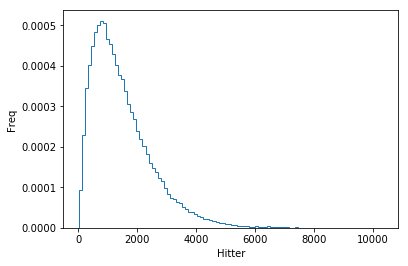

In [23]:
# Draw samples of waiting times: waiting_times
waiting_times=successive_poisson(764,715,100000)

# Make the histogram
plt.hist(waiting_times,bins=100, normed=True,histtype='step')


# Label axes
plt.xlabel('Hitter')
plt.ylabel('Freq')

# Show the plot
plt.show()


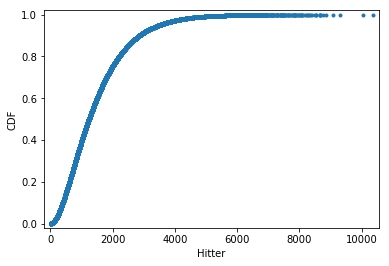

In [24]:
x,y=ecdf(waiting_times)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Hitter')
_ = plt.ylabel('CDF')
plt.show()